# Contents
01 - Import Library
02 - Import Data
03 - Task 4.10
    3.1 Dropping Columns
    3.2 Creating a region flag
    3.3 Exclusion Flag for customers under 5 max orders
    3.4 Creating an age flag
    3.5 Visualizations by Dept, Region & Loyalty
    3.6 Visualization by Loyalty Status
    3.7 Visualization by kids
    3.8 Income Flag
    3.9 Dept Visualizations
    3.10 Region Visualizations
    3.11 Marital Status
    3.12 Spending and Age
    3.13 Day of week visualizations
    3.14 Aggregations
    3.15 Gender Visualizations
    3.16 Frequency Visualizations
04 - Saving Data
    4.1 Price Label Breakdown

# 01 Import Library

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02 Import Data

In [2]:
#folder shortcut
path = r'/Users/rachelmoreland/06_2023_Instacart Basket Analysis'

In [3]:
#importing newdataset
df_ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orda_prods_all_updated.pkl'))

In [4]:
df_ords_prods_all.head()

,user_id,first,last,gender,state,age,date_joined,number_of_dependants,marital_status,income,...,price_label,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_prices,spending_flag,median_order_freq,frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Busiest days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Regularly busy,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Busiest days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Low-range product,Regularly busy,Regularly busy,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Low-range product,Regularly busy,Least busy,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer


In [5]:
df_ords_prods_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30629741 entries, 0 to 30629740
Data columns (total 32 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   user_id                 object 
 1   first                   object 
 2   last                    object 
 3   gender                  object 
 4   state                   object 
 5   age                     int64  
 6   date_joined             object 
 7   number_of_dependants    int64  
 8   marital_status          object 
 9   income                  int64  
 10  product_id              int64  
 11  product_name            object 
 12  aisle_id                int64  
 13  department_id           int64  
 14  prices                  float64
 15  order_id                int64  
 16  order_number            int64  
 17  orders_day_of_week      int64  
 18  order_hour_of_day       int64  
 19  days_since_prior_order  float64
 20  add_to_cart_order       int64  
 21  reordered               int64

In [6]:
#making a crosstab to see if days since prior orders that are 0 are just the first order
crosstab = pd.crosstab(df_ords_prods_all['days_since_prior_order'], df_ords_prods_all['order_number'], dropna = False)

In [7]:
#copying the table straight to clipboard
crosstab.to_clipboard()

In [8]:
df_ords_prods_all.columns

Index(['user_id', 'first', 'last', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependants', 'marital_status', 'income', 'product_id',
       'product_name', 'aisle_id', 'department_id', 'prices', 'order_id',
       'order_number', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered',
       'price_label', 'busiest_day', 'busiest_days', 'busiest_period_of_day',
       'max_order', 'loyalty_flag', 'avg_prices', 'spending_flag',
       'median_order_freq', 'frequency_flag'],
      dtype='object')

# 03 Task Part 1

## 3.1 dropping columns 

In [ ]:

#dropping first and last name columns due to PII
df_ords_prods_all = df_ords_prods_all.drop(columns = ['first'])

In [10]:
#dropping first and last name columns due to PII
df_ords_prods_all = df_ords_prods_all.drop(columns = ['last'])

In [11]:
#checking dropped columns
df_ords_prods_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30629741 entries, 0 to 30629740
Data columns (total 30 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   user_id                 object 
 1   gender                  object 
 2   state                   object 
 3   age                     int64  
 4   date_joined             object 
 5   number_of_dependants    int64  
 6   marital_status          object 
 7   income                  int64  
 8   product_id              int64  
 9   product_name            object 
 10  aisle_id                int64  
 11  department_id           int64  
 12  prices                  float64
 13  order_id                int64  
 14  order_number            int64  
 15  orders_day_of_week      int64  
 16  order_hour_of_day       int64  
 17  days_since_prior_order  float64
 18  add_to_cart_order       int64  
 19  reordered               int64  
 20  price_label             object 
 21  busiest_day             objec

## 3.2 Creating a region flag

In [12]:
#3 making a group/list of southern states
states_south = ['Deleware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [13]:
#3 making a group/list of ne states
states_ne = ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']

In [14]:
#3 checking the list
states_ne

['Maine',
 'New Hampshire',
 'Vermont',
 'Massachusetts',
 'Rhode Island',
 'Connecticut',
 'New York',
 'Pennsylvania',
 'New Jersey']

In [15]:
states_south

['Deleware',
 'Maryland',
 'District of Columbia',
 'Virginia',
 'West Virginia',
 'North Carolina',
 'South Carolina',
 'Georgia',
 'Florida',
 'Kentucky',
 'Tennessee',
 'Mississippi',
 'Alabama',
 'Oklahoma',
 'Texas',
 'Arkansas',
 'Louisiana']

In [16]:
#3 making a group/list of weatern states
states_west = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [17]:
#3 making a group/list of midwest states
states_mw = ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']

In [18]:
#3 using loc function to make a new region column
df_ords_prods_all.loc[df_ords_prods_all['state'].isin(states_south), 'region'] = 'South'

In [19]:
#3 using loc function to make a new region column
df_ords_prods_all.loc[df_ords_prods_all['state'].isin(states_ne), 'region'] = 'Northeast'

In [20]:
#3 using loc function to make a new region column
df_ords_prods_all.loc[df_ords_prods_all['state'].isin(states_mw), 'region'] = 'Midwest'

In [21]:
#3 using loc function to make a new region colum
df_ords_prods_all.loc[df_ords_prods_all['state'].isin(states_west), 'region'] = 'West'

In [22]:
#3 checking output
df_ords_prods_all.head(20)

,user_id,gender,state,age,date_joined,number_of_dependants,marital_status,income,product_id,product_name,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_prices,spending_flag,median_order_freq,frequency_flag,region
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Regularly busy,Busiest days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Regularly busy,Regularly busy,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Regularly busy,Busiest days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Regularly busy,Regularly busy,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Regularly busy,Least busy,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest
5,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Regularly busy,Busiest days,Average Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest
6,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Regularly busy,Busiest days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest
7,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Regularly busy,Busiest days,Average Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest
8,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Regularly busy,Regularly busy,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest
9,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Regularly busy,Busiest days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest


In [23]:
#3 checking to see what the spending habits look like across regions
crosstab = pd.crosstab(df_ords_prods_all['region'], df_ords_prods_all['spending_flag'], dropna = False)

In [24]:
#3 
crosstab

spending_flag,High Spender,Low Spender
region,,
Midwest,149817,7027107
Northeast,101420,5320605
South,180566,9419443
West,147803,7684007


# the south seems to have the most customers across the board

## 3.3 making an exclusion flag for customers under 5 max orders

In [25]:
#checking column names
df_ords_prods_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30629741 entries, 0 to 30629740
Data columns (total 31 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   user_id                 object 
 1   gender                  object 
 2   state                   object 
 3   age                     int64  
 4   date_joined             object 
 5   number_of_dependants    int64  
 6   marital_status          object 
 7   income                  int64  
 8   product_id              int64  
 9   product_name            object 
 10  aisle_id                int64  
 11  department_id           int64  
 12  prices                  float64
 13  order_id                int64  
 14  order_number            int64  
 15  orders_day_of_week      int64  
 16  order_hour_of_day       int64  
 17  days_since_prior_order  float64
 18  add_to_cart_order       int64  
 19  reordered               int64  
 20  price_label             object 
 21  busiest_day             objec

In [26]:
#4making an exclusion flag for people who order less than 5 times
df_ords_prods_all['exclusion_flag'] = df_ords_prods_all['max_order'].apply(lambda x: 'Yes' if x < 5 else 'No')

In [27]:
#4checking the columns
df_ords_prods_all.head(20)

,user_id,gender,state,age,date_joined,number_of_dependants,marital_status,income,product_id,product_name,...,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_prices,spending_flag,median_order_freq,frequency_flag,region,exclusion_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Busiest days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,No
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Regularly busy,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,No
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Busiest days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,No
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Regularly busy,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,No
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Least busy,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,No
5,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Busiest days,Average Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,No
6,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Busiest days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,No
7,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Busiest days,Average Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,No
8,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Regularly busy,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,No
9,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Busiest days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,No


In [28]:
#4making subset df excluding low activity customers
df_low_activity_excluded = df_ords_prods_all[df_ords_prods_all['exclusion_flag']== 'No']

In [29]:
#4checking the count for the exclusion flag
df_ords_prods_all['exclusion_flag'].value_counts(dropna = False)

No     29270938
Yes     1358803
Name: exclusion_flag, dtype: int64

In [30]:
#4 seeing if the number matches in the new subset df
df_low_activity_excluded.shape

(29270938, 32)

In [31]:
#4 Export new data set to pkl

df_low_activity_excluded.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'low_activity_excluded.pkl'))

## 3.4 creating an age flag

In [32]:
#creating an age flag
df_ords_prods_all.loc[df_ords_prods_all['age']>65,'age_flag'] = 'Senior'

In [33]:
#creating an age flag
df_ords_prods_all.loc[(df_ords_prods_all['age']<=65) & (df_ords_prods_all['age']>44),'age_flag'] = 'Middle Age'

In [34]:
#creating an age flag
df_ords_prods_all.loc[df_ords_prods_all['age']<=45,'age_flag'] = 'Young Adult'

In [35]:
#checking count
df_ords_prods_all['age_flag'].value_counts(dropna = False)

Young Adult    13411301
Middle Age      9573789
Senior          7644651
Name: age_flag, dtype: int64

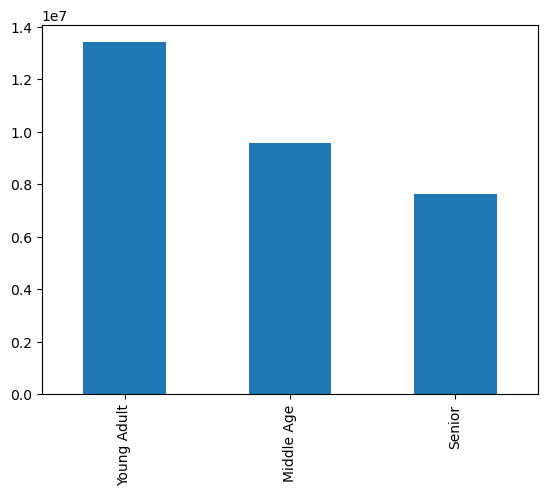

In [36]:
#making a bar chart showing customers by age bracket
bar_age = df_ords_prods_all['age_flag'].value_counts().plot.bar()

In [37]:
#saving bar chart
bar_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age.png'))

## 3.5 Visualizations by department, region & loyalty

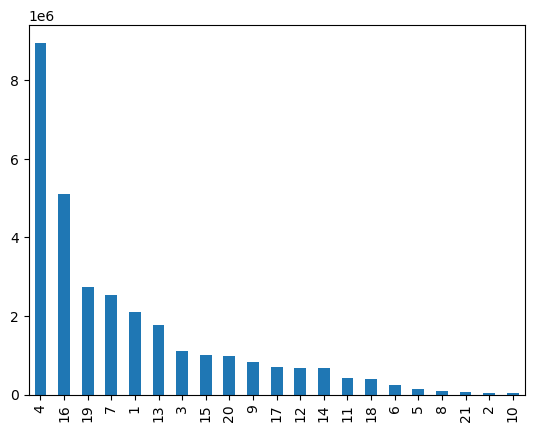

In [38]:
#bar chart on dept _id purchases
bar_dept = df_ords_prods_all['department_id'].value_counts().plot.bar()

In [41]:
department_names = {1: 'Frozen', 2: 'Other', 3: 'Bakery', 4: 'Produce',5: 'Alcohol', 6: 'International',7: 'Beverages', 8:'Pets',9:'Dry Goods Pasta',10: 'Bulk', 11: 'Personal Care', 12: 'Meat/Seafood', 13: 'Pantry', 14: 'Breakfast',15:'Canned Goods', 16: 'Dairy/Eggs', 17: 'Household', 18: ' Babies', 19:'Snacks',20:'Deli',21:'Missing'}

In [42]:
department_counts = df_ords_prods_all['department_id'].value_counts()

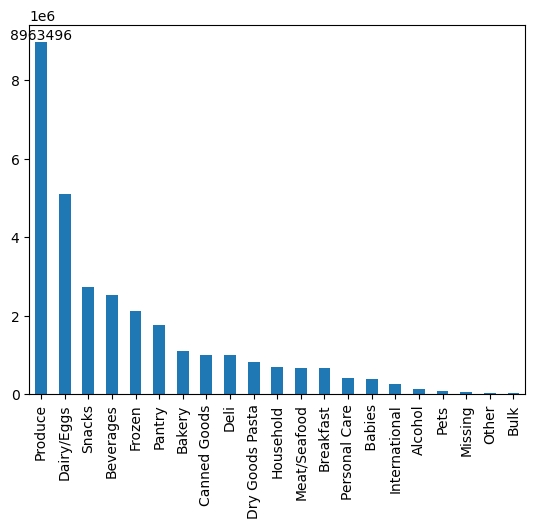

In [43]:
ax = department_counts.plot.bar()
ax.set_xticklabels([department_names.get(x, '') for x in department_counts.index])
for i, v in enumerate(department_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')
    plt.show()

In [44]:
#saving bar chart for dept
ax.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dept.png'))

In [45]:
#trying to make a multi bar chart of dept and region
region_department_counts = df_ords_prods_all.groupby(['department_id','region']).size().unstack(fill_value=0)

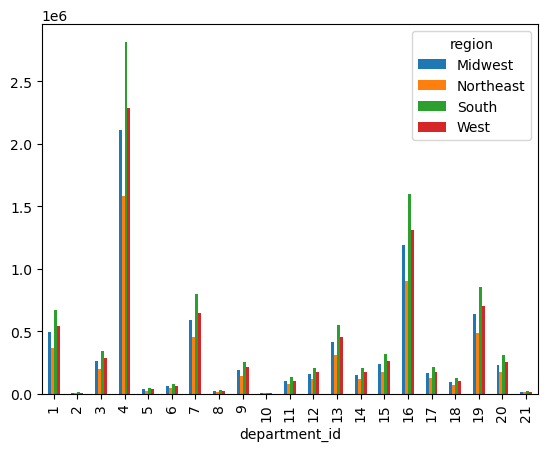

In [46]:
#multi bar chart for region and dept
reg_dept = region_department_counts.plot.bar(stacked=False)


In [47]:
#saving bar chart for reg and dept
reg_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_reg_dept.png'))

In [48]:
#trying to make a stacked bar chart of dept and loyalty
loyalty_department_counts = df_ords_prods_all.groupby(['department_id','loyalty_flag']).size().unstack(fill_value=0)

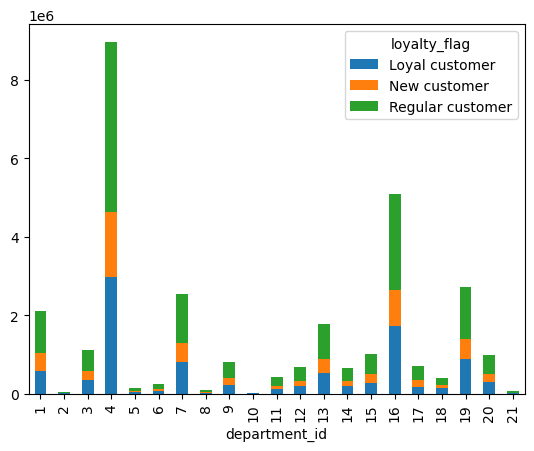

In [49]:
#stacked bar chart for loyalty and dept
loyal_dept = loyalty_department_counts.plot.bar(stacked=True)

In [50]:
#saving bar chart for loyalty and dept
loyal_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyal_dept.png'))

## 3.6 Loyalty Status

In [54]:
#grouping age and loyalty
age_loyalty_counts = df_ords_prods_all.groupby(['age_flag','loyalty_flag']).size().unstack(fill_value=0)

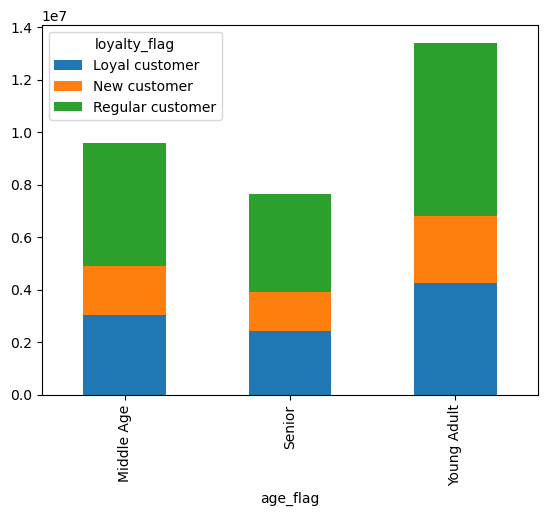

In [55]:
#bar for age and loyalty 
age_loyalty_counts = age_loyalty_counts.plot.bar(stacked=True )

In [56]:
#saving bar for age and loyalty
age_loyalty_counts.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_loyalty.png'))

In [57]:
#grouping marital and loyalty
marital_loyalty_counts = df_ords_prods_all.groupby(['marital_status','loyalty_flag']).size().unstack(fill_value=0)

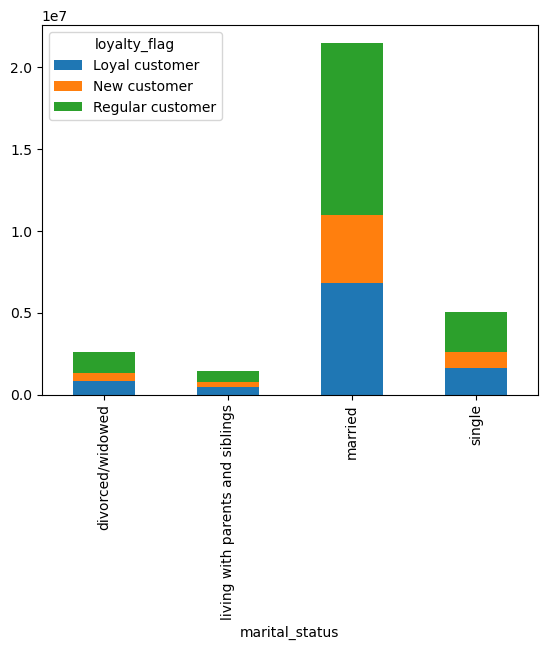

In [58]:
#bar for marital and loyalty
marital_loyalty_counts = marital_loyalty_counts.plot.bar(stacked=True )

In [59]:
#saving bar for marital and loyalty
marital_loyalty_counts.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'marital_loyalty.png'))

## 3.7 Visualizations for Kids

In [60]:
#making a group/list for kids
kids = [1,2,3]

In [61]:
#making a group/list for no kids
no_kids = [0]

In [62]:
#kids flag
df_ords_prods_all.loc[df_ords_prods_all['number_of_dependants'].isin(kids), 'kids'] = 'has kids'

In [63]:
#kids flag
df_ords_prods_all.loc[df_ords_prods_all['number_of_dependants'].isin(no_kids), 'kids'] = 'no kids'

In [64]:
#checking count
df_ords_prods_all['kids'].value_counts(dropna = False)

has kids    22980043
no kids      7649698
Name: kids, dtype: int64

In [65]:
df_ords_prods_all.head()

,user_id,gender,state,age,date_joined,number_of_dependants,marital_status,income,product_id,product_name,...,max_order,loyalty_flag,avg_prices,spending_flag,median_order_freq,frequency_flag,region,exclusion_flag,age_flag,kids
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,No,Middle Age,has kids
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,No,Middle Age,has kids
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,No,Middle Age,has kids
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,No,Middle Age,has kids
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,No,Middle Age,has kids


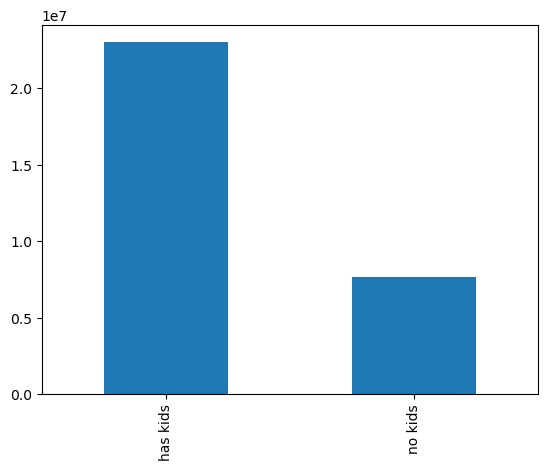

In [66]:
#bar chart showing customers with kids
bar_kids = df_ords_prods_all['kids'].value_counts().sort_index().plot.bar()

In [67]:
#saving bar for kids
bar_kids.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_kids.png'))

## 3.8 Income Flag

In [70]:
#creating an income  flag
df_ords_prods_all.loc[df_ords_prods_all['income']>= 156000,'income_flag'] = 'high income'

In [71]:
#creating an income flag
df_ords_prods_all.loc[(df_ords_prods_all['income']<=155999) & (df_ords_prods_all['income']>=52000),'income_flag'] = 'middle income'

In [72]:
#creating an income  flag
df_ords_prods_all.loc[df_ords_prods_all['income'] <52000,'income_flag'] = 'low income'

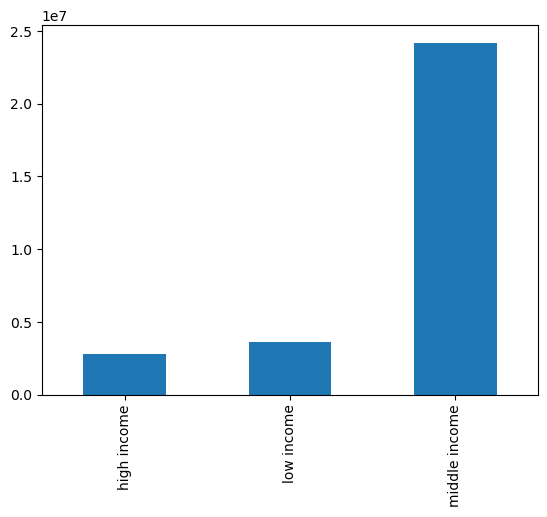

In [73]:
bar_income = df_ords_prods_all['income_flag'].value_counts().sort_index().plot.bar()

In [74]:
#saving bar for income
bar_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income.png'))

## 3.9 Dept Visualizations

In [75]:
#trying to make a stacked bar chart of dept and age
age_department_counts = df_ords_prods_all.groupby(['department_id','age_flag']).size().unstack(fill_value=0)

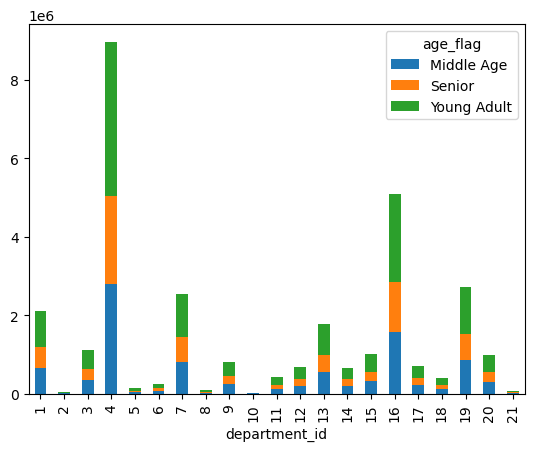

In [76]:
#bar for dept and age
age_department = age_department_counts.plot.bar(stacked=True )

In [77]:
#saving bar for age and dept
age_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_dept.png'))

In [78]:
#trying to make a stacked bar chart of dept and kids
kid_department_counts = df_ords_prods_all.groupby(['department_id','kids']).size().unstack(fill_value=0)

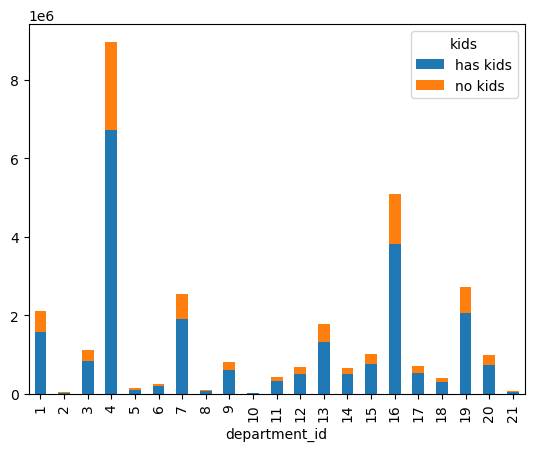

In [79]:
#bar for dept and kids
kid_department = kid_department_counts.plot.bar(stacked=True )

In [80]:
#saving bar for kid and dept
kid_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_kid_dept.png'))

In [81]:
#trying to make a stacked bar chart of dept and income
income_department_counts = df_ords_prods_all.groupby(['department_id','income_flag']).size().unstack(fill_value=0)

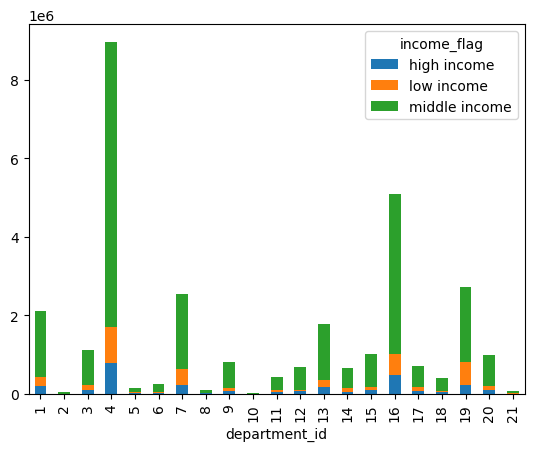

In [82]:
#bar for dept and income
income_department = income_department_counts.plot.bar(stacked=True )

In [83]:
#saving bar for income and dept
income_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_dept.png'))

## 3.10 Region Visulizations

In [84]:
#trying to make a stacked bar chart of region and age
region_age_counts = df_ords_prods_all.groupby(['region','age_flag']).size().unstack(fill_value=0)

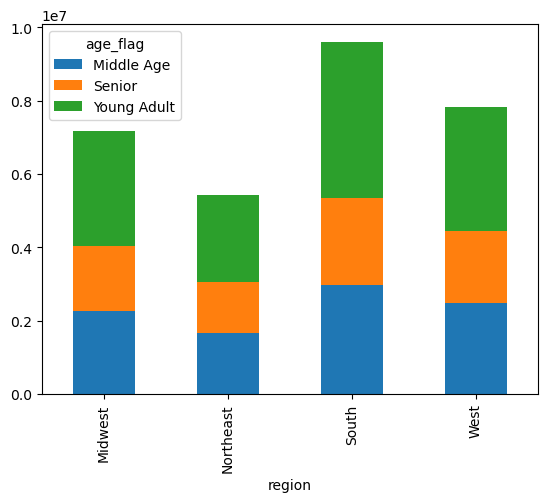

In [85]:
#bar for region and age
region_age = region_age_counts.sort_index().plot.bar(stacked=True )

In [86]:
#saving bar for age and region
region_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_age.png'))

In [87]:
#trying to make a stacked bar chart of region and kids
region_kid_counts = df_ords_prods_all.groupby(['region','kids']).size().unstack(fill_value=0)

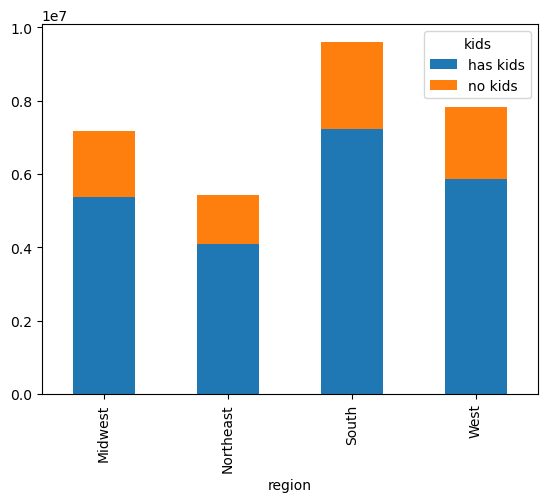

In [88]:
#bar for region and kids
region_kid = region_kid_counts.plot.bar(stacked=True )

In [89]:
#saving bar for age and region
region_kid.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_kid.png'))

In [90]:
#trying to make a stacked bar chart of region and income
region_income_counts = df_ords_prods_all.groupby(['region','income_flag']).size().unstack(fill_value=0)

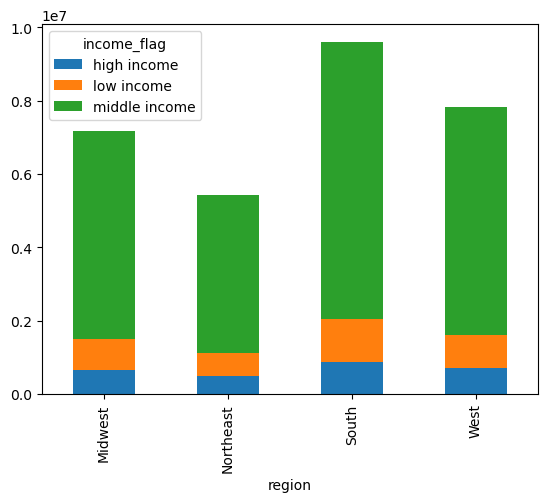

In [91]:
#bar for region and income
region_income = region_income_counts.plot.bar(stacked=True )

In [92]:
#saving bar for income and region
region_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_income.png'))

In [93]:
#trying to make a stacked bar chart of region and marital_status
region_marital_counts = df_ords_prods_all.groupby(['region','marital_status']).size().unstack(fill_value=0)

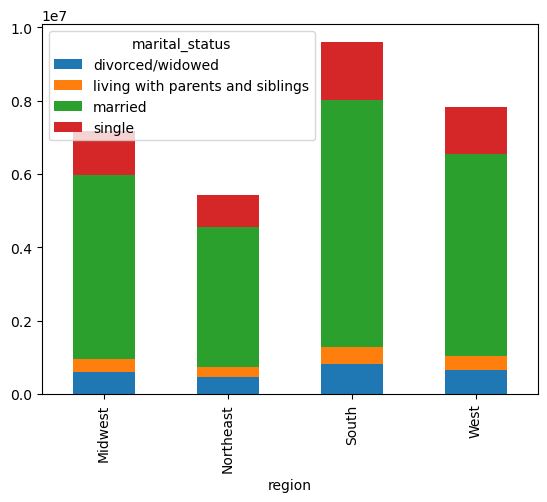

In [94]:
#bar for region and marital status
region_marital = region_marital_counts.plot.bar(stacked=True )

In [95]:
#saving bar for marital and region
region_marital.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_marital.png'))

In [96]:
#trying to make a stacked bar chart of dept and marital_status
dept_marital_counts = df_ords_prods_all.groupby(['department_id','marital_status']).size().unstack(fill_value=0)

## 3.11 Marital Status

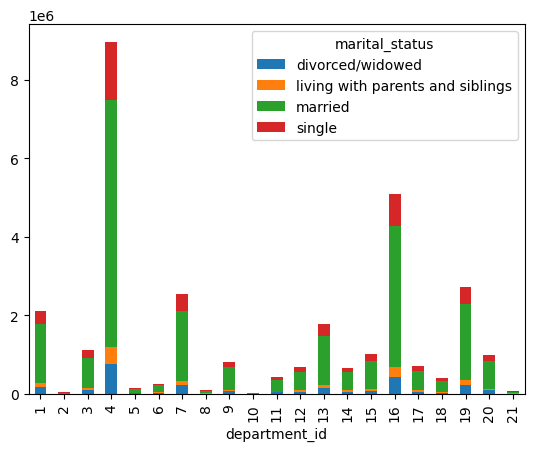

In [97]:
#bar for dept and marital status
dept_marital = dept_marital_counts.plot.bar(stacked=True )

In [98]:
#saving bar for marital and dept
dept_marital.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dept_marital.png'))

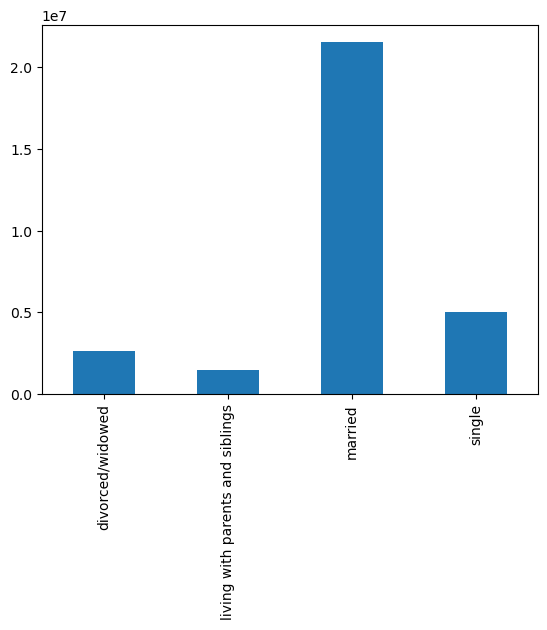

In [99]:
#bar chart for marital status
bar_marital = df_ords_prods_all['marital_status'].value_counts().sort_index().plot.bar()

In [100]:
#saving bar for marital 
bar_marital.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_marital.png'))

## 3.12 Spending and age

In [101]:
#trying to make a stacked bar chart of spending_flag and age
spending_age_counts = df_ords_prods_all.groupby(['age_flag','spending_flag']).size().unstack(fill_value=0)

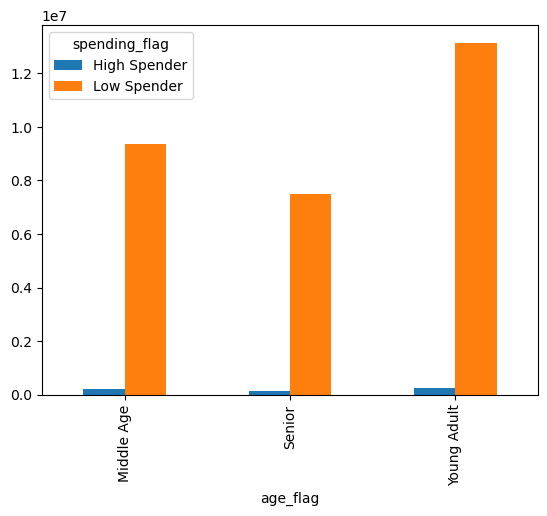

In [102]:
#trying to make a stacked bar chart of spending and age

spending_age = spending_age_counts.plot.bar(stacked=False )

## 3.13 Day of week visualizations

In [108]:
#trying to make a stacked bar chart of dow and age
dow_age_counts = df_ords_prods_all.groupby(['orders_day_of_week','age_flag']).size().unstack(fill_value=0)

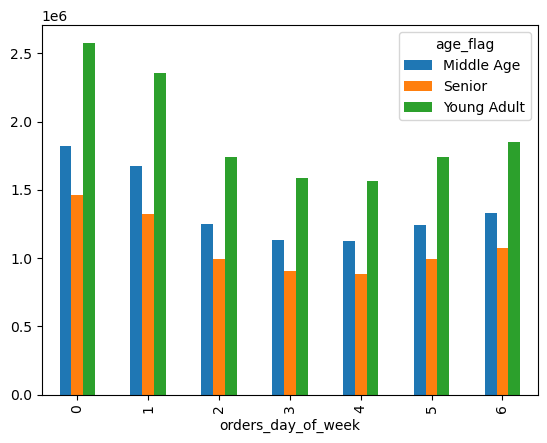

In [109]:
#bar chart for dow and age
dow_age = dow_age_counts.plot.bar(stacked=False )

In [111]:
#saving bar for dow and age
dow_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dow_age.png'))

In [107]:
df_ords_prods_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30629741 entries, 0 to 30629740
Data columns (total 35 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   user_id                 object 
 1   gender                  object 
 2   state                   object 
 3   age                     int64  
 4   date_joined             object 
 5   number_of_dependants    int64  
 6   marital_status          object 
 7   income                  int64  
 8   product_id              int64  
 9   product_name            object 
 10  aisle_id                int64  
 11  department_id           int64  
 12  prices                  float64
 13  order_id                int64  
 14  order_number            int64  
 15  orders_day_of_week      int64  
 16  order_hour_of_day       int64  
 17  days_since_prior_order  float64
 18  add_to_cart_order       int64  
 19  reordered               int64  
 20  price_label             object 
 21  busiest_day             objec

In [112]:
#trying to make a stacked bar chart of dow and marital
dow_marital_counts = df_ords_prods_all.groupby(['orders_day_of_week','marital_status']).size().unstack(fill_value=0)

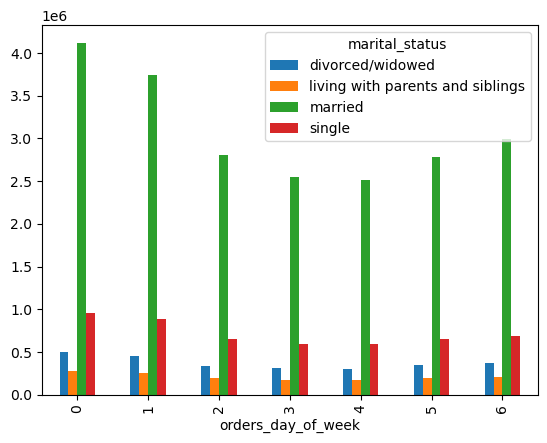

In [113]:
#bar chart for dow and age
dow_marital = dow_marital_counts.plot.bar(stacked=False )

In [114]:
#saving bar for dow and marital
dow_marital.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dow_marital.png'))

In [115]:
#trying to make a stacked bar chart of dow and kids
dow_kid_counts = df_ords_prods_all.groupby(['orders_day_of_week','kids']).size().unstack(fill_value=0)

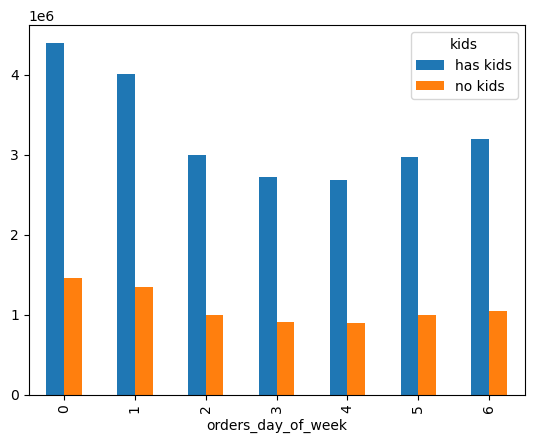

In [116]:
#bar chart for dow and kids
dow_kid = dow_kid_counts.plot.bar(stacked=False )

In [117]:
#saving bar for dow and kids
dow_kid.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dow_kid.png'))

In [118]:
#trying to make a stacked bar chart of dow and income
dow_income_counts = df_ords_prods_all.groupby(['orders_day_of_week','income_flag']).size().unstack(fill_value=0)

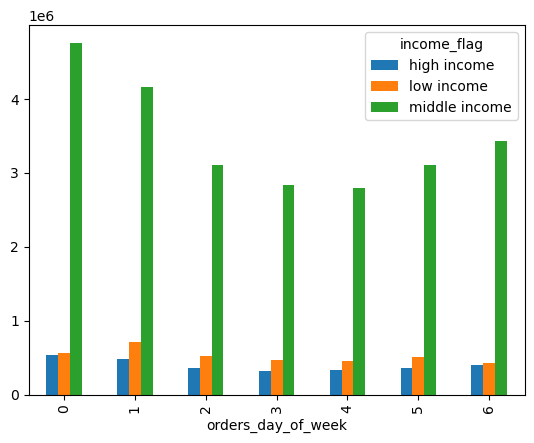

In [119]:
#bar chart for dow and income
dow_income = dow_income_counts.plot.bar(stacked=False )

In [132]:
#saving bar for dow and income
dow_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dow_income.png'))

## 3.14 Aggregations

In [123]:
# running aggregations on customer profiles by expenditure
df_ords_prods_all.groupby('age_flag').agg({'prices': ['mean', 'min', 'max']})

prices           
                 mean  min   max
age_flag                        
Middle Age   7.791384  1.0  25.0
Senior       7.794917  1.0  25.0
Young Adult  7.790584  1.0  25.0

In [124]:
# running aggregations on customer profiles by expenditure
df_ords_prods_all.groupby('kids').agg({'prices': ['mean', 'min', 'max']})

prices           
              mean  min   max
kids                         
has kids  7.792702  1.0  25.0
no kids   7.789555  1.0  25.0

In [125]:
# running aggregations on customer profiles by expenditure
df_ords_prods_all.groupby('income_flag').agg({'prices': ['mean', 'min', 'max']})

prices           
                   mean  min   max
income_flag                       
high income    7.943462  1.0  25.0
low income     6.743844  1.0  25.0
middle income  7.932774  1.0  25.0

In [126]:
# running aggregations on customer profiles by expenditure
df_ords_prods_all.groupby('marital_status').agg({'prices': ['mean', 'min', 'max']})

prices           
                                      mean  min   max
marital_status                                       
divorced/widowed                  7.801055  1.0  25.0
living with parents and siblings  7.806768  1.0  25.0
married                           7.791740  1.0  25.0
single                            7.783529  1.0  25.0

In [127]:
# running aggregations on customer profiles byfrequency 
df_ords_prods_all.groupby('age_flag').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                              mean  min   max
age_flag                                     
Middle Age               10.408511  0.0  30.0
Senior                   10.368798  0.0  30.0
Young Adult              10.408470  0.0  30.0

In [128]:
# running aggregations on customer profiles byfrequency 
df_ords_prods_all.groupby('kids').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                           mean  min   max
kids                                      
has kids              10.406284  0.0  30.0
no kids               10.375442  0.0  30.0

In [129]:
# running aggregations on customer profiles byfrequency 
df_ords_prods_all.groupby('income_flag').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                mean  min   max
income_flag                                    
high income                10.273898  0.0  30.0
low income                 10.745740  0.0  30.0
middle income              10.360486  0.0  30.0

In [130]:
# running aggregations on customer profiles byfrequency 
df_ords_prods_all.groupby('marital_status').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                                   mean  min   max
marital_status                                                    
divorced/widowed                              10.323045  0.0  30.0
living with parents and siblings              10.344811  0.0  30.0
married                                       10.410488  0.0  30.0
single                                        10.402894  0.0  30.0

## 3.15 Gender visualization

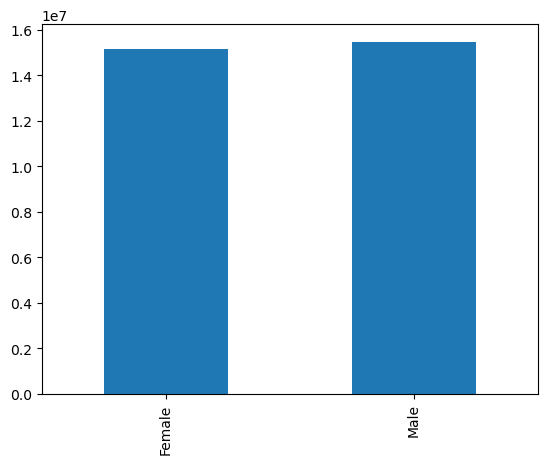

In [131]:
#bar chart for gender
bar_gender = df_ords_prods_all['gender'].value_counts().sort_index().plot.bar()

In [133]:
#saving bar for gender
bar_gender.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_gender.png'))

In [134]:
#checking count
df_ords_prods_all['gender'].value_counts(dropna = False)

Male      15462635
Female    15167106
Name: gender, dtype: int64

## 3.16 Frequency Visulizations

In [136]:
#trying to make a stacked bar chart of frequency and age
freq_age = df_ords_prods_all.groupby(['frequency_flag','age_flag']).size().unstack(fill_value=0)

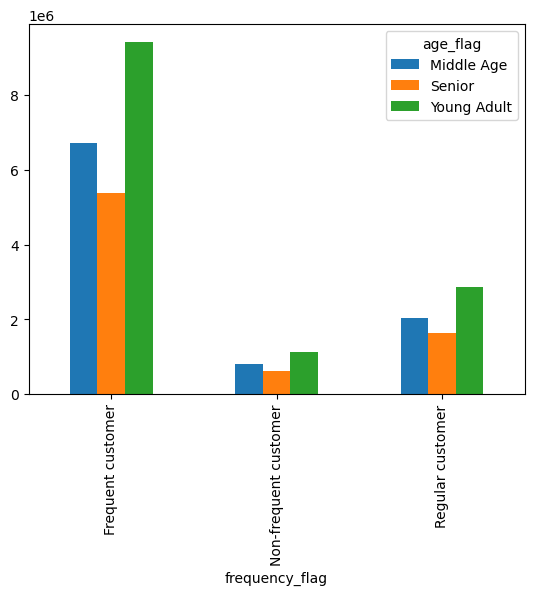

In [137]:
#bar chart for freq and age
freq_age = freq_age.plot.bar(stacked=False )

In [138]:
#saving bar for freq and age
freq_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_freq_age.png'))

In [139]:
#trying to make a stacked bar chart of frequency and kids
freq_kid = df_ords_prods_all.groupby(['frequency_flag','kids']).size().unstack(fill_value=0)

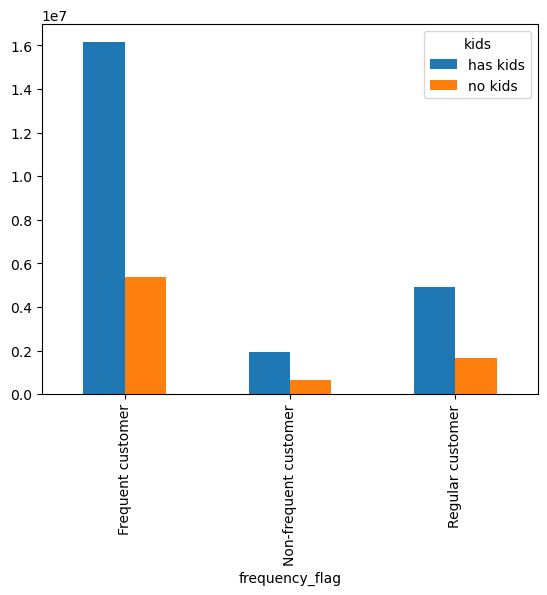

In [140]:
#bar chart for freq and kid
freq_kid = freq_kid.plot.bar(stacked=False )

In [141]:
#saving bar for freq and kid
freq_kid.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_freq_kid.png'))

In [142]:
#trying to make a stacked bar chart of frequency and income
freq_income = df_ords_prods_all.groupby(['frequency_flag','income_flag']).size().unstack(fill_value=0)

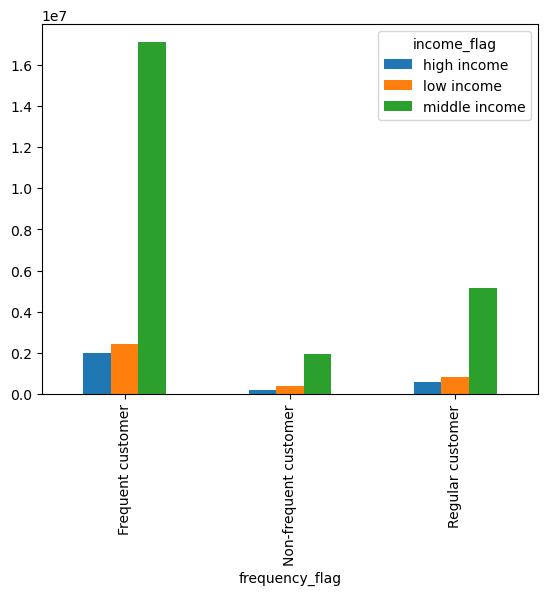

In [143]:
#bar chart for freq and income
freq_income = freq_income.plot.bar(stacked=False )

In [144]:
#saving bar for freq and kid
freq_kid.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_freq_kid.png'))

# 04 Saving Data

In [149]:
# export data to pkl

df_ords_prods_all.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_all_410.pkl'))

## 4.1 Price Label Breakdown

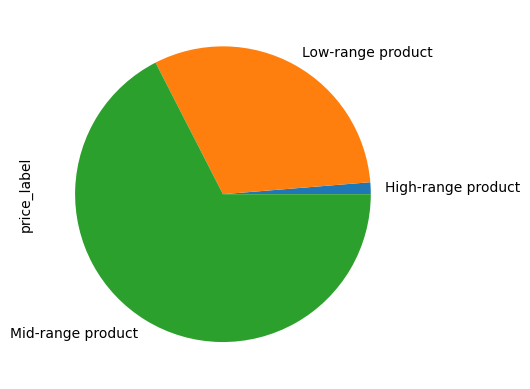

In [147]:
price_label = df_ords_prods_all['price_label'].value_counts().sort_index().plot.pie()

In [148]:
#saving bar for price
price_label.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_price_label.png'))